In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [60]:
df_features = pd.read_csv('data/dados_tratados.csv')
df_features

,aaron,aaron judg,aaron kesel,aaron rodger,ab,abandon,abc,abe,aberti,abil,...,yorker,young,younger,youth,youtub,zach,zapatista,zealand,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020746,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041774,...,0.0,0.000000,0.053833,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035750,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055128,...,0.0,0.048464,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_target = pd.read_csv('data/labels.csv')
df_target

,Label
0,1
1,1
2,1
3,1
4,1
...,...
3983,0
3984,0
3985,0
3986,1


In [62]:
X = df_features.values
y = df_target.values

print(f'Features: {X}')
print(X.shape)

print(f'Target: {y}')
print(y.shape)

Features: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(3988, 5000)
Target: [[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
(3988, 1)


#Treinamento Do Modelo

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
#Separando conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), train_size = 0.7, random_state = 1)

In [65]:
from sklearn import metrics
import itertools

In [66]:
# Funcao para plot da matriz de confusao
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Modelo com MultinomialNB

In [67]:
from sklearn.naive_bayes import MultinomialNB
classifier1=MultinomialNB()

Accuracy:   0.917
Confusion matrix, without normalization


Text(0.5, 1.0, 'Treino: MultinomialNB')

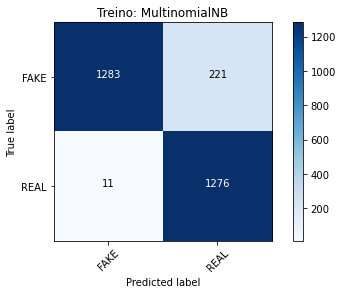

In [68]:
#Testando o modelo com os dados de treino
classifier1.fit(X_train, y_train)
pred_train = classifier1.predict(X_train)
score_train = metrics.accuracy_score(y_train, pred_train)
print("Accuracy:   %0.3f" % score_train)
cm_train = metrics.confusion_matrix(y_train, pred_train)

plot_confusion_matrix(cm_train, classes=['FAKE', 'REAL'])
plt.title(f'Treino: MultinomialNB')

Accuracy:   0.906
Confusion matrix, without normalization


Text(0.5, 1.0, 'Teste: MultinomialNB')

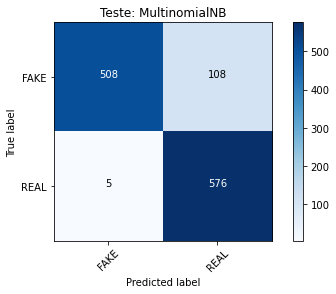

In [69]:
#Treinamento do modelo com dados de teste
pred_test = classifier1.predict(X_test)
score_test = metrics.accuracy_score(y_test, pred_test)
print("Accuracy:   %0.3f" % score_test)
cm_test = metrics.confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm_test, classes=['FAKE', 'REAL'])
plt.title(f'Teste: MultinomialNB')

In [70]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       616
           1       0.84      0.99      0.91       581

    accuracy                           0.91      1197
   macro avg       0.92      0.91      0.91      1197
weighted avg       0.92      0.91      0.91      1197



Modelo com MLPClassifier

In [86]:
from sklearn.neural_network import MLPClassifier
classifier2 = MLPClassifier(hidden_layer_sizes=(1,1), 
                           activation='relu',
                           solver = 'adam',
                           alpha=0.0001,
                           random_state=3)

Accuracy:   1.000
Confusion matrix, without normalization


Text(0.5, 1.0, 'Treino: MLPClassifier')

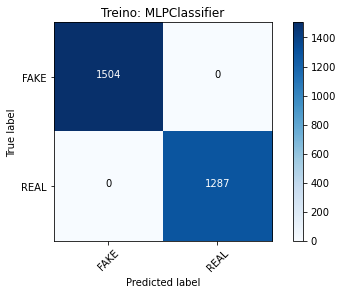

In [87]:
#Classificando com os dados de treino
classifier2.fit(X_train, y_train)
pred_train = classifier2.predict(X_train)
score_train = metrics.accuracy_score(y_train, pred_train)
print("Accuracy:   %0.3f" % score_train )
cm_train = metrics.confusion_matrix(y_train, pred_train)

plot_confusion_matrix(cm_train, classes=['FAKE', 'REAL'])
plt.title(f'Treino: MLPClassifier')

Accuracy:   0.969
Confusion matrix, without normalization


Text(0.5, 1.0, 'Teste: MultinomialNB')

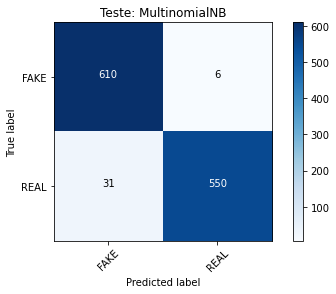

In [88]:
#Treinamento do modelo com dados de teste
pred_test = classifier2.predict(X_test)
score_test = metrics.accuracy_score(y_test, pred_test)
print("Accuracy:   %0.3f" % score_test)
cm_test = metrics.confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm_test, classes=['FAKE', 'REAL'])
plt.title(f'Teste: MultinomialNB')

In [89]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       616
           1       0.99      0.95      0.97       581

    accuracy                           0.97      1197
   macro avg       0.97      0.97      0.97      1197
weighted avg       0.97      0.97      0.97      1197

